In [1]:
# impoting the required libraries
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv("delivery_time.csv")
data.head(2).append(data.tail(2))

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
19,17.83,7
20,21.50,5


In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

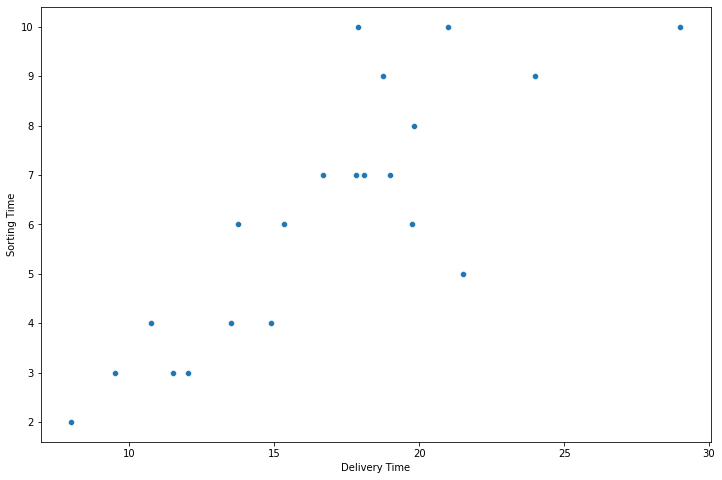

In [6]:
# plotting the scatter plot using seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(x="Delivery Time", y="Sorting Time", data=data)

In [7]:
# line is of the form a+bx
def coef(x,y):
    # size of the 
    n = np.size(x)
    # sum of all x values
    sum_of_x = np.sum(x)
    
    #sum of all y values 
    sum_of_y = np.sum(y)
    
    # mean of x values
    mean_of_x = np.mean(x)
    
    # mean of y values
    mean_of_y = np.mean(y)
    
    # sum of x*x 
    sum_of_x_square = np.sum(x*x)
    
    # sum of x*y 
    sum_of_x_y = np.sum(x*y)
    # finding the value of a in ax+b
    a_num = sum_of_y*sum_of_x_square-sum_of_x*sum_of_x_y
    a_denom = n*sum_of_x_square - sum_of_x*sum_of_x
    a = a_num/a_denom
    
    # finding value of b in ax+b
    b_num = n*sum_of_x_y-sum_of_x*sum_of_y
    b_denom = n*sum_of_x_square - sum_of_x*sum_of_x
    b = b_num/b_denom
    return (a,b)

In [8]:
# finding the pearson's coeffcient
def pearsons(x,y):
    std_x = np.std(x)
    std_y = np.std(y)
    r_num= np.sum(x*y)- np.size(x)*np.mean(x)*np.mean(y)
    r_denom = (np.size(x)-1)*std_x*std_y
    r = r_num/r_denom
    return r

In [9]:
# goodness of fit
def fit(x,y):
    std_x = np.std(x)
    std_y = np.std(y)
    r_num= np.sum(x*y)- np.size(x)*np.mean(x)*np.mean(y)
    r_denom = (np.size(x)-1)*std_x*std_y
    r_square = (r_num*r_num)/(r_denom*r_denom)
    return r_square

In [10]:
#plotting the regression line
def regression_line(x, y, c):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "b",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = c[0] + c[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 

Estimated coefficients:
b_0 = 6.582733971997045 b_1 = 1.6490198968312435
perason's correlation coffecient:  0.8672971238353102
goodness of fit:  0.7522043010130014


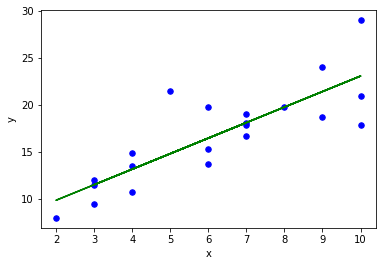

In [11]:
def main():
    # observations / data
    x = data["Sorting Time"]
    y = data["Delivery Time"]
 
    # estimating coefficients
    b = coef(x, y)
    print("Estimated coefficients:\nb_0 = {} b_1 = {}".format(b[0], b[1]))
    r = pearsons(x,y)
    print("perason's correlation coffecient: ",r)
    
    rsquare= fit(x,y)
    print("goodness of fit: ",rsquare)
 
    # plotting regression line
    regression_line(x, y, b)
 
if __name__ == "__main__":
    main()